In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
df = pd.read_csv("../Datasets/breast_cancer.csv")
data = df.dropna() # Suppression des lignes(les tirs) dont nous ne connaissons pas l'issue(marqué ou manqué)
X = data.loc[:, ~df.columns.str.contains("diagnosis")].values
y = data["diagnosis"].values # Target : issue du tir 

dummy_y = y.copy()
for ligne in range(len(y)):
    if y[ligne] == 'M':
        dummy_y[ligne] = 1
    else:
        dummy_y[ligne] = 0

In [25]:
from sklearn.preprocessing import MinMaxScaler


def processing_data(X):

    # create scaler
    scaler = MinMaxScaler()
    # fit and transform in one step
    normalized = scaler.fit_transform(X)
    # inverse transform
    inverse = scaler.inverse_transform(normalized)
    
    return normalized

X_process = processing_data(X)

In [15]:
dummy_y = dummy_y.astype(int)

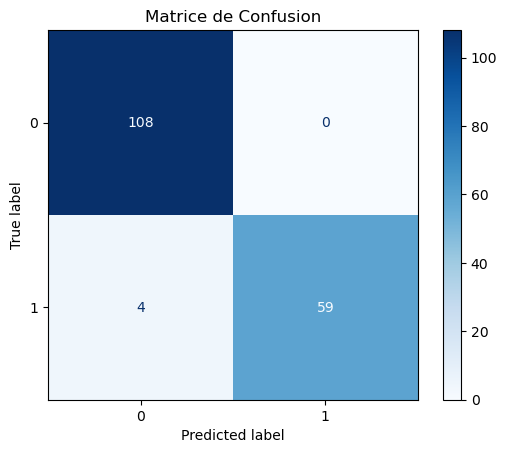

In [26]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_process, dummy_y, test_size=0.3, random_state=42)

# Entraîner le modèle de régression logistique avec BFGS
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Tracer la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()